## Assignmnet 1 Classification NON LInear part


# class 1 vs class 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt(r"C:\Users\sppat\Projects\DL assignments\Assignment_1\data_assignment_1\Group09\Group09\Classification\NLS_Group09.txt",skiprows=1)

In [3]:
data # first 500 class 1 , next 500 class 2 , last 700 class 3



array([[-0.402701,  0.239545],
       [-0.431687,  0.270068],
       [ 0.07758 ,  0.491364],
       ...,
       [ 0.420225,  2.2934  ],
       [ 0.785933, -2.126691],
       [ 0.380529, -2.442912]], shape=(1700, 2))

In [4]:
class1 = data[:500]
class2 = data[500 : 1000]
class3 = data[1000 : ]

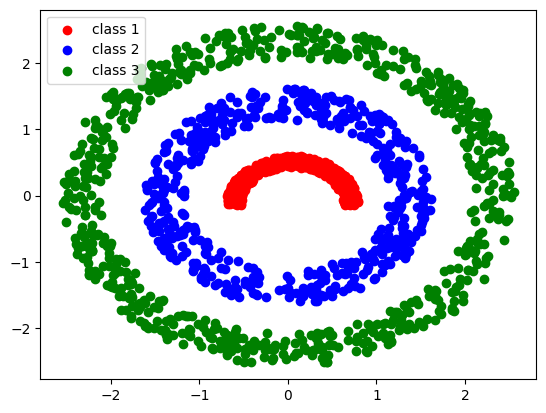

In [5]:
plt.scatter(class1[:,0],class1[:,1],color = 'r',label = "class 1")
plt.scatter(class2[:,0],class2[:,1],color = 'b',label = "class 2")
plt.scatter(class3[:,0],class3[:,1],color = 'g',label = "class 3")
plt.legend()
plt.show()

In [6]:
def binary_data_class_maker(class_A , class_B): # class A  will have label as 1 , unlike class B will have label as 0
    class_A_label = np.insert(class_A , 2,0 , axis= 1)
    class_B_label = np.insert(class_B , 2,1 , axis= 1)
    return class_A_label , class_B_label    

In [7]:
def sigmoidal_function(activation_value): # it will restrict the output from it inbetween 0 to 1.
    f = 1/(1 + np.exp(-activation_value))
    return f


In [8]:
np.random.seed(42)

In [9]:
def predict(input_x , weights , bias):
    p = np.dot(input_x , weights) + bias
    a = sigmoidal_function(p)
    return a


In [10]:
class_1_with_label  , class_2_with_label = binary_data_class_maker(class1 , class2)


class_1_2_data  = np.concatenate((class_1_with_label  , class_2_with_label), axis= 0)


np.random.shuffle(class_1_2_data)

# Splitting the data

split = int(len(class_1_2_data)*0.7)

train_1_2 = class_1_2_data[ :split]
test_1_2 = class_1_2_data[split : ]

In [ ]:
# training on class 1 v/s class2 


weights = np.random.randn(2)*0.01 # shape: (2,)

print("weights before training",weights)
eta = 0.01
Epoches  = 1000
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_1_2 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights = weights + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss")
plt.show()
    


In [12]:
print("Weights after training ",weights)

Weights after training  [-0.25712451 -0.80377312]


In [13]:
# i want to draw the confusion matrix

test_1_2.shape


(300, 3)

In [14]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_1_2:
    prediction = np.dot(weights.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        72    |     87
       ________|_________ 
               |
        15      |     126




In [15]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 66 %
precision is 82.75862068965517
recall is 0.4528301886792453


In [16]:
# to plot the curve showing the boundary 
x1_test = []
x2_test = []
label = []
for i in test_1_2:
    x1_test.append(i[0])
    x2_test.append(i[1])
    label.append(i[2])

    

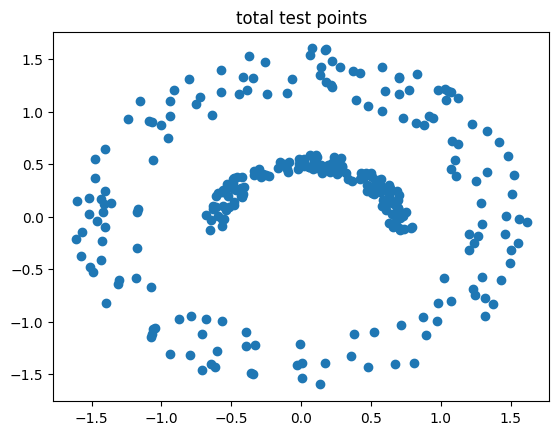

In [17]:
plt.scatter(x1_test,x2_test)
plt.title("total test points")
plt.show()

# now we have to draw a decsision boundary inbetweeen them .

In [18]:
x_values_1_2 = np.linspace(np.min(x1_test),np.max(x1_test), 20)
# x_values
y_values_1_2= -(weights[0]/weights[1])*x_values_1_2
# y_values_1_2

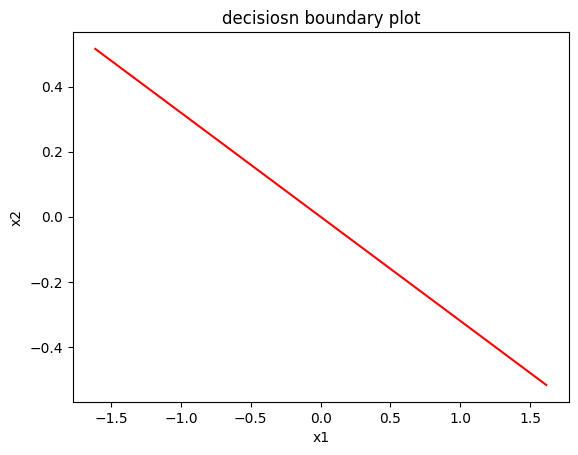

In [19]:
plt.plot(x_values_1_2,y_values_1_2 , color ='r')
plt.title("decisiosn boundary plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

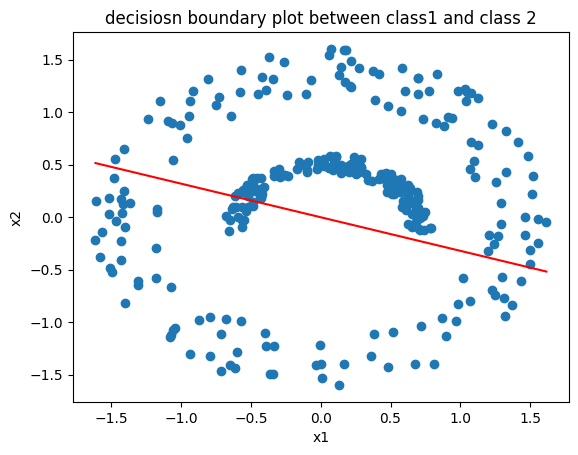

In [20]:
# combining both the graphs

plt.scatter(x1_test,x2_test)
plt.plot(x_values_1_2,y_values_1_2 , color ='r')
plt.title("decisiosn boundary plot between class1 and class 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Class 1 v/s Class 3

In [21]:
class_1_with_label  , class_3_with_label = binary_data_class_maker(class1 , class3)


class_1_3_data  = np.concatenate((class_1_with_label  , class_3_with_label), axis= 0)


np.random.shuffle(class_1_3_data)

# Splitting the data

split = int(len(class_1_3_data)*0.7)

train_1_3 = class_1_3_data[ :split]
test_1_3 = class_1_3_data[split : ]

In [ ]:
# training on class 1 v/s class2 

weights_1_3 = np.random.randn(2)*0.01 # shape: (2,)
print("weights before " ,weights_1_3 )

eta = 0.01
Epoches  = 700
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_1_3 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights_1_3.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights_1_3 = weights_1_3 + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss class1 v/s class 3")
plt.show()
    


In [23]:
weights_1_3

array([-0.12868699, -0.1818339 ])

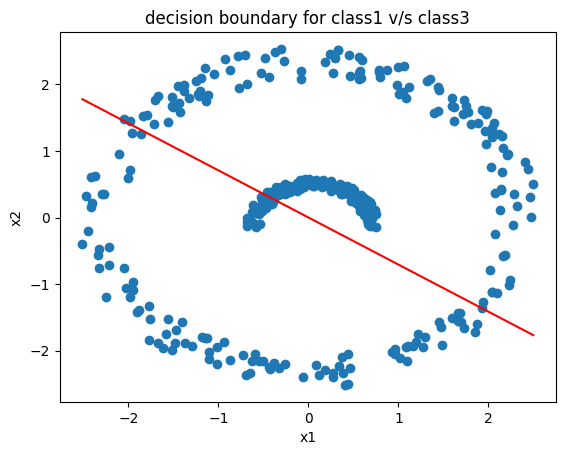

In [24]:
x_val = []
y_val = []
for i in test_1_3:
    x_val.append(i[0])
    y_val.append(i[1])

plt.scatter(x_val,y_val)

# for boundary line

x_values_1_3 = np.linspace(np.min(x_val) , np.max(x_val) , 100)
y_values_1_3 = -(weights_1_3[0]/weights_1_3[1])*x_values_1_3

plt.plot(x_values_1_3,y_values_1_3,color = 'r')
plt.title("decision boundary for class1 v/s class3")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()




In [25]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_1_3:
    prediction = np.dot(weights_1_3.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        98    |     120
       ________|_________ 
               |
        29      |     113




In [26]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 58 %
precision is 77.16535433070865
recall is 0.44954128440366975


# Class 2 v/s Class 3


In [27]:
class_2_with_label  , class_3_with_label = binary_data_class_maker(class2 , class3)


class_2_3_data  = np.concatenate((class_2_with_label  , class_3_with_label), axis= 0)


np.random.shuffle(class_2_3_data)

# Splitting the data

split = int(len(class_2_3_data)*0.7)

train_2_3 = class_2_3_data[ :split]
test_2_3 = class_2_3_data[split : ]

array([-0.0046531 , -0.00105948])

In [ ]:
# training on class 1 v/s class2 

weights_2_3 = np.random.randn(2)*0.01 # shape: (2,)

print(" Weights of 2nd and 3rd class is ",weights_2_3)

eta = 0.01
Epoches  = 600
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_2_3 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights_2_3.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights_2_3 = weights_2_3 + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss class 2 v/s class 3")
plt.show()
    


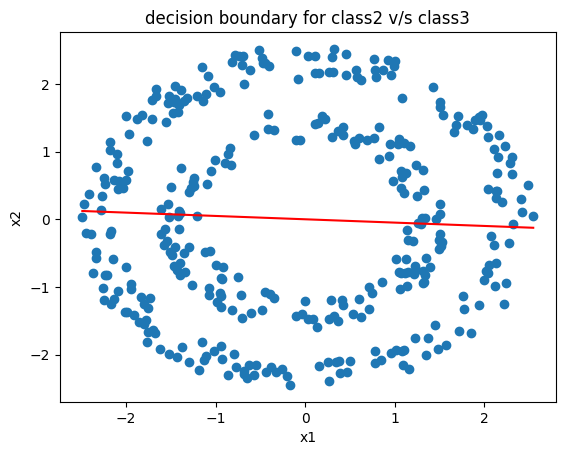

In [31]:
x_val = []
y_val = []
for i in test_2_3:
    x_val.append(i[0])
    y_val.append(i[1])

plt.scatter(x_val,y_val)

# for boundary line

x_values_2_3 = np.linspace(np.min(x_val) , np.max(x_val) , 100)
y_values_2_3 = -(weights_2_3[0]/weights_2_3[1])*x_values_2_3

plt.plot(x_values_2_3,y_values_2_3,color = 'r')
plt.title("decision boundary for class2 v/s class3")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()




In [32]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_2_3:
    prediction = np.dot(weights_2_3.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        99    |     115
       ________|_________ 
               |
        85      |     61




In [33]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 44 %
precision is 53.80434782608695
recall is 0.46261682242990654


In [32]:
# creating vote system , so that one which got highest vote will win the match

class_1_2_3_data  = np.concatenate((class1  , class2  ,class3), axis= 0)
class_1_2_3_data.shape

(1500, 2)

In [34]:
print(f'''
weights for class 1 v/s class 2 {weights}
weights for class 1 v/s class 3 {weights_1_3}
weights for class 2 v/s class 3 {weights_2_3}
''')


weights for class 1 v/s class 2 [-0.25712451 -0.80377312]
weights for class 1 v/s class 3 [-0.12868699 -0.1818339 ]
weights for class 2 v/s class 3 [-0.00494754 -0.10055183]



In [35]:
class_1_label = np.insert(class1 , 2,1 , axis= 1)
class_2_label = np.insert(class2 , 2,2 , axis= 1)
class_3_label = np.insert(class3 , 2,3 , axis= 1)

class_1_2_3_data  = np.concatenate((class_1_label  , class_2_label  ,class_3_label), axis= 0)
np.random.shuffle(class_1_2_3_data)
class_1_2_3_data.shape

(1700, 3)

In [ ]:
plt.figure(figsize=(14 ,10))
plt.scatter(class1[:,0],class1[:,1],color = 'r',label = "class 1")
plt.plot(x_values_1_2,y_values_1_2,color = 'black',label= "separater 1 and 2" )
plt.scatter(class2[:,0],class2[:,1],color = 'b',label = "class 2")
plt.plot(x_values_1_3,y_values_1_3,color = 'orange',label= "separater 1 and 3")
plt.scatter(class3[:,0],class3[:,1],color = 'g',label = "class 3")
plt.plot(x_values_2_3,y_values_2_3,color = 'pink',label= "separater 2 and 3")
plt.legend()
# plt.text(18,-5,"class 1",fontsize=25)
# plt.text(12,11,"class 2",fontsize=25)
# plt.text(-7,-10,"class 3",fontsize=25)

plt.show()

In [40]:
# cannot be classified using single perceptron 